In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
#loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
gold_data.shape


(2290, 6)

In [4]:
gold_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
#to check any missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
#getting statistical measures of the data
gold_data.describe()



,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
# Assuming 'Date' is a column in your DataFrame
# If 'Date' is not needed for correlation, you can exclude it
columns_for_correlation = gold_data.select_dtypes(include=[np.number]).columns
correlation = gold_data[columns_for_correlation].corr()


<Axes: >

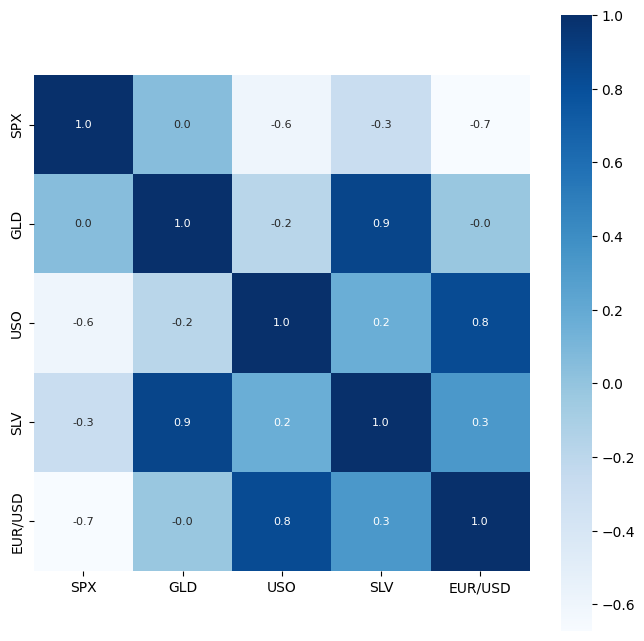

In [8]:
plt.figure (figsize = (8, 8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size' : 8}, cmap = 'Blues')

In [9]:
#correlation values of GOLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-10-1639637e9f47>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color = 'red')


<Axes: xlabel='GLD', ylabel='Density'>

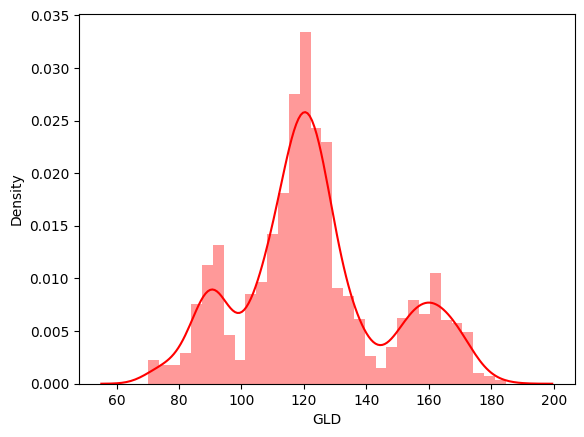

In [10]:
#checkin the distribution of the gold prices
sns.distplot(gold_data['GLD'], color = 'red')

In [11]:
#splitting the fearures and target
X = gold_data.drop(['Date','GLD'], axis = 1)
y = gold_data['GLD']

In [12]:
print(X)


              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [13]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [14]:
#splitting into training and testing data
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [15]:
#model Training(Random forest Regressor)
regressor = RandomForestRegressor(n_estimators = 100)

In [16]:
#training the model
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [17]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [18]:
print(test_data_prediction)

[168.40289949  82.21939971 116.20469981 127.58790113 120.80350147
 154.75929747 150.64779842 126.14899997 117.46699884 126.05970077
 116.84820105 172.46140027 142.58279907 167.94339874 115.10410021
 117.39410056 139.06830231 170.24420123 159.26430275 158.73570008
 155.12150015 125.19530021 176.02969999 156.93390356 125.08810037
  93.79749957  78.10309998 120.69619995 119.1033994  167.53159973
  88.12090092 125.20019994  91.18950088 117.65180027 121.02299893
 137.05320087 115.41630129 115.90740059 147.94570004 107.02710095
 104.24560239  87.16879757 126.45830052 118.0024004  154.08709916
 119.76949985 108.40489937 108.29359817  93.17510055 127.10649816
  75.24210024 113.61309912 121.30429996 111.33879892 118.97529907
 120.79889945 159.66119992 168.11080109 146.80049681  86.03479889
  94.30190043  86.75989892  90.54030015 118.84600073 126.32500044
 127.29990021 169.2830994  122.25619902 117.32689887  99.04960018
 168.38630146 143.3010984  131.86900247 121.27640227 120.98999941
 119.98470

In [19]:
#r2_score
error_score = metrics.r2_score(y_test, test_data_prediction)

In [20]:
print (error_score)

0.988897308660557


In [21]:
y_test = list(y_test)

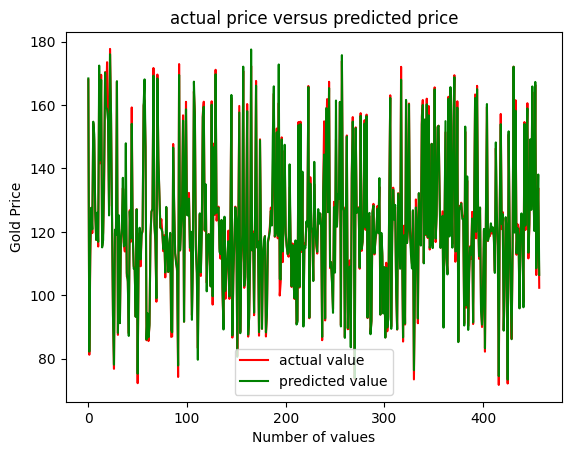

In [22]:
plt.plot(y_test, color = 'red', label = 'actual value' )
plt.plot(test_data_prediction, color = 'green', label = 'predicted value' )
plt.title('actual price versus predicted price')
plt.xlabel('Number of values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()